Вариант 21

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats

In [25]:
data = pd.read_excel('./data7/Лабораторная работа 7.xlsx', sheet_name=21,names=['class', 'x1', 'x2', 'x3','x4']).dropna()
data

,class,x1,x2,x3,x4
0,2,2.058194,-3.675930,0.705999,1.348435
1,2,2.827172,-5.090396,0.369739,1.664767
2,2,2.447059,-3.859393,1.320597,0.360182
3,1,0.155244,1.259059,1.867954,-1.221063
4,2,1.214989,3.676789,0.617139,2.176812
...,...,...,...,...,...
195,2,4.498288,-1.005643,1.311897,1.911068
196,2,0.490260,3.781592,0.703450,0.386531
197,1,0.902459,-3.006255,1.264102,0.645793
198,1,2.189660,-7.472041,1.529387,1.310878


двумерные диаграммы рассеяния с раскраской по классам

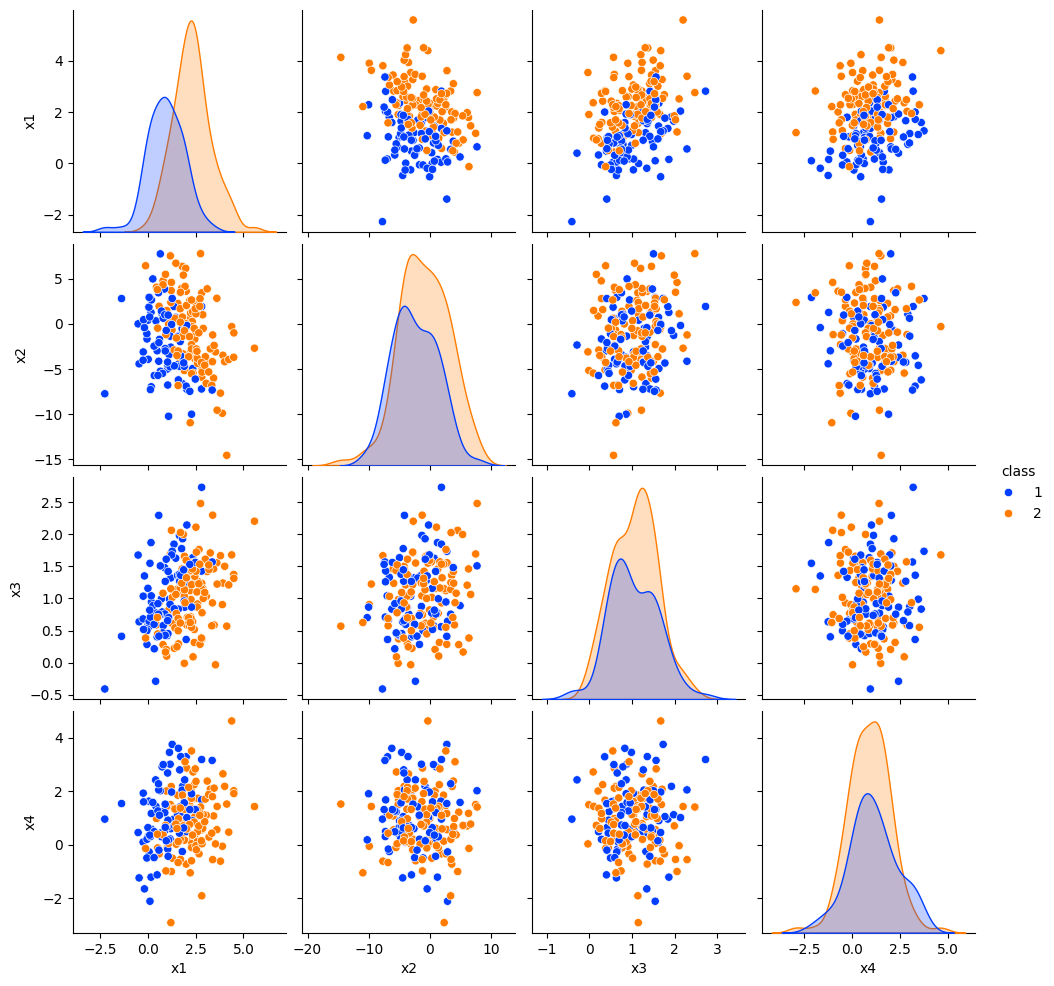

In [26]:
sns.pairplot(data, hue='class', palette='bright')

диаграммы рассеяния в координатах главных компонент с раскраской по классам

<Axes: xlabel='PC1', ylabel='PC2'>

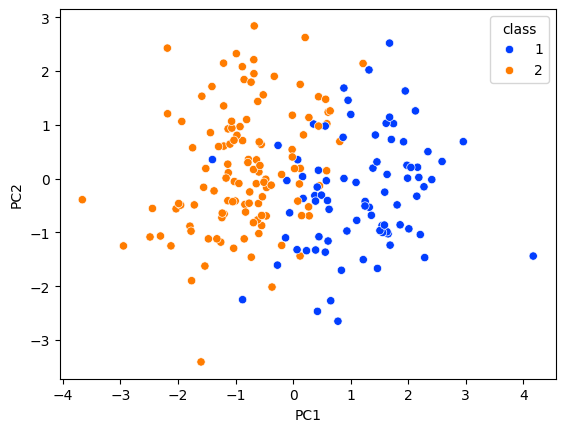

In [27]:
sns.scatterplot(x = 'PC1', y = 'PC2', data = scores_svd, hue=data['class'], palette='bright')

график зависимости доли объясненной дисперсии от номера главной компоненты

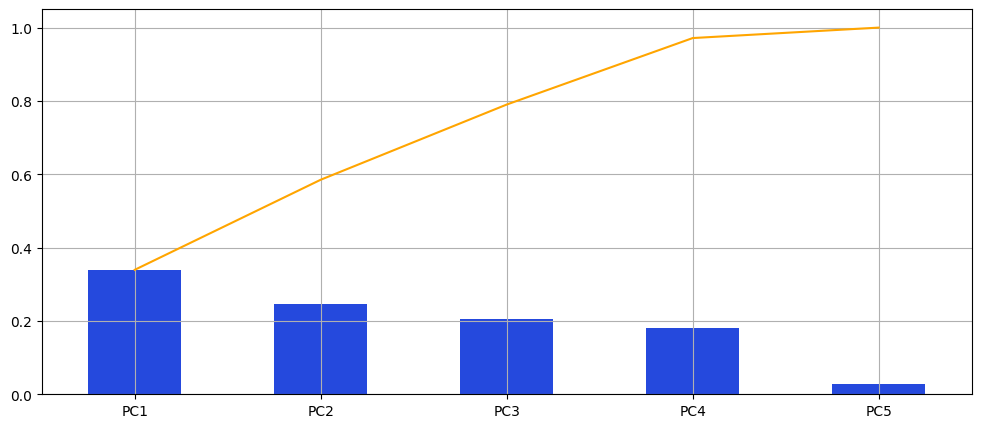

In [28]:
sc = StandardScaler()
sc.fit(data.astype('float64'))
datasc = sc.transform(data.astype('float64'))
datasc = pd.DataFrame(datasc, index=data.index, columns=data.columns)
cov_mat = np.cov(datasc.T)
u,s,v = np.linalg.svd(cov_mat)
np.where(s > s.sum()/len(s))[0]
scores_svd = pd.DataFrame(datasc @ u[:,:2])
scores_svd.columns = ['PC1','PC2']
pd.Series(s/s.sum(),
      index = [f'PC{x+1}' for x in range(datasc.shape[1])]).plot.bar(color = '#2549dd', figsize = (12, 5));
pd.Series((s/s.sum()).cumsum(),
      index = [f'PC{x+1}' for x in range(datasc.shape[1])]).plot(color = 'orange')
plt.grid()